<a href="https://colab.research.google.com/github/Jash-Bhatia/Machine_Learning/blob/master/ML_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

np.random.seed(27)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# setting up default plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [3]:
#-O All downloaded content is stored at filename
 
!wget -O 2011gcn.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/2011gcn.csv
!wget -O tx2011partvertices_new.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices_new.csv
!wget -O tx2011partvertices.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices.csv

train1 = pd.read_csv('2011gcn.csv')
train2 = pd.read_csv('tx2011partvertices_new.csv')
train3 = pd.read_csv('tx2011partvertices.csv')

print('Train 1 Shape: ', train1.shape)
print('Train 2 Shape: ', train2.shape)
print('Train 3 Shape: ', train3.shape)



--2020-09-23 18:35:02--  https://raw.githubusercontent.com/pranavn91/blockchain/master/2011gcn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12563086 (12M) [text/plain]
Saving to: ‘2011gcn.csv’

2011gcn.csv         100%[===================>]  11.98M  58.6MB/s    in 0.2s    

2020-09-23 18:35:03 (58.6 MB/s) - ‘2011gcn.csv’ saved [12563086/12563086]

--2020-09-23 18:35:03--  https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices_new.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12501458 (12M) [text/plain]

In [4]:
train1.rename(columns={'Unnamed: 0':'index'}, inplace=True)
train1['index'] = train1['index'] + 1
print(train1.head())

train2.rename(columns={'Unnamed: 0':'index'}, inplace=True)
print(train2.head())

train3.rename(columns={'Unnamed: 0':'index'}, inplace=True)
print(train3.head())

   index    0             1    2  ...   12   13            14            15
0      1  0.0  4.811244e+07  0.0  ...  0.0  0.0  2.670458e+07  8.313858e+07
1      2  0.0  3.477977e+05  0.0  ...  0.0  0.0  1.915057e+05  6.009039e+05
2      3  0.0  6.455196e+07  0.0  ...  0.0  0.0  3.583296e+07  1.115463e+08
3      4  0.0  2.009876e+08  0.0  ...  0.0  0.0  1.116514e+08  3.472892e+08
4      5  0.0  2.384675e+05  0.0  ...  0.0  0.0  1.315073e+05  4.120424e+05

[5 rows x 17 columns]
   index  txsize  txvirtualsize  ...  Total_sent  Stdev_sent  Var_sent
0      1    7369           7369  ...      2.1500    0.703445  0.494835
1      2     293            293  ...      0.0440    0.000000  0.000000
2      3   11139          11139  ...      1.2500    0.000000  0.000000
3      4     495            495  ...      0.2745    0.000000  0.000000
4      5     462            462  ...      0.0300    0.000000  0.000000

[5 rows x 20 columns]
   index         label
0      1  unclassified
1      2     donations
2  

In [5]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96498 entries, 0 to 96497
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   96498 non-null  int64  
 1   0       96498 non-null  float64
 2   1       96498 non-null  float64
 3   2       96498 non-null  float64
 4   3       96498 non-null  float64
 5   4       96498 non-null  float64
 6   5       96498 non-null  float64
 7   6       96498 non-null  float64
 8   7       96498 non-null  float64
 9   8       96498 non-null  float64
 10  9       96498 non-null  float64
 11  10      96498 non-null  float64
 12  11      96498 non-null  float64
 13  12      96498 non-null  float64
 14  13      96498 non-null  float64
 15  14      96498 non-null  float64
 16  15      96498 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 12.5 MB


In [6]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96498 entries, 0 to 96497
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            96498 non-null  int64  
 1   txsize           96498 non-null  int64  
 2   txvirtualsize    96498 non-null  int64  
 3   txinputs_count   96498 non-null  int64  
 4   txoutputs_count  96498 non-null  int64  
 5   txinput_val      96498 non-null  float64
 6   txoutput_val     96498 non-null  float64
 7   txfee            96498 non-null  int64  
 8   Min_received     96498 non-null  float64
 9   Max_received     96498 non-null  float64
 10  Avg_received     96498 non-null  float64
 11  Total_received   96498 non-null  float64
 12  Stdev_received   96498 non-null  float64
 13  Var_received     96498 non-null  float64
 14  Min_sent         96498 non-null  float64
 15  Max_sent         96498 non-null  float64
 16  Avg_sent         96498 non-null  float64
 17  Total_sent  

In [7]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96498 entries, 0 to 96497
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   96498 non-null  int64 
 1   label   96498 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [8]:
##preparing the data

results = pd.merge(train3, train1, on='index', how='inner')

# split data into X and y
X = results.iloc[:,2:18]
Y1 = results['label']
Y1

0        unclassified
1           donations
2        unclassified
3           donations
4           donations
             ...     
96493       donations
96494       donations
96495       donations
96496        exchange
96497        exchange
Name: label, Length: 96498, dtype: object

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(results['label'].unique())
Y = pd.DataFrame(le.transform(Y1))

In [10]:
Y.nunique()

0    6
dtype: int64

In [11]:
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(77198, 16)
(19300, 16)
(77198, 1)
(19300, 1)


In [13]:
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

logi = LogisticRegression()
sdg = SGDClassifier()
ridge = RidgeClassifier()
dtree = DecisionTreeClassifier(criterion = 'entropy')
rf = RandomForestClassifier()

models = [logi, sdg, ridge, dtree, rf]

In [14]:
def get_cv_score(model):
  scores = cross_val_score(model, X = X_train, y = y_train, cv = 5)
  print(scores)
  print("CV Mean:", np.mean(scores))
  print("STD:", np.std(scores))
  print("\n")

In [15]:
for i in models:
  print(i)
  get_cv_score(i)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
[0.85524611 0.85641192 0.85479275 0.853747   0.85368223]
CV Mean: 0.8547760029693995
STD: 0.0010151522053404927


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
[0.86392487 0.85408031 0.09546632 0.85918777 0.8635922 ]
CV Mean: 0.7072502950773678
STD: 0.3059128618212313


RidgeClassifier(alpha=1.0

Best model here is RidgeClassifier with

CV Mean: 0.870566573716317

STD: 0.0007428653284920603





In [16]:
## applying GridSearch

alpha = [0.5,0.1,0.05,0.01,0.0001]
solvers = ['auto','lsqr','svd']

params = dict(alpha = alpha, solver = solvers)

In [17]:
from sklearn.model_selection import RandomizedSearchCV

rgrid = RandomizedSearchCV(estimator = ridge,param_distributions=params, scoring='accuracy',verbose=1, n_iter=10, n_jobs=-1)
rgrid_result = rgrid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.5s finished


Code for grid search using logistic regression is mentioned in this block, double click **here**

> Indented block




<!--
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=logistic, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
-->

In [18]:
results = pd.DataFrame(rgrid_result.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.081308,0.010308,0.004108,0.000376,lsqr,0.05,"{'solver': 'lsqr', 'alpha': 0.05}",0.870855,0.870661,0.870272,0.869810,0.869227,0.870165,0.000590,7
1,0.084889,0.010534,0.004350,0.000587,lsqr,0.5,"{'solver': 'lsqr', 'alpha': 0.5}",0.870855,0.870661,0.870272,0.869810,0.869227,0.870165,0.000590,7
2,0.084577,0.006073,0.003854,0.000161,lsqr,0.0001,"{'solver': 'lsqr', 'alpha': 0.0001}",0.870855,0.870661,0.870272,0.869810,0.869227,0.870165,0.000590,7
3,0.063321,0.004423,0.004256,0.000526,auto,0.1,"{'solver': 'auto', 'alpha': 0.1}",0.871632,0.870661,0.871049,0.869875,0.869616,0.870567,0.000743,1
4,0.076343,0.008062,0.003980,0.000330,lsqr,0.01,"{'solver': 'lsqr', 'alpha': 0.01}",0.870855,0.870661,0.870272,0.869810,0.869227,0.870165,0.000590,7
5,0.097381,0.007207,0.004529,0.000794,svd,0.05,"{'solver': 'svd', 'alpha': 0.05}",0.871632,0.870661,0.871049,0.869875,0.869616,0.870567,0.000743,1
6,0.064923,0.006539,0.004620,0.000561,auto,0.05,"{'solver': 'auto', 'alpha': 0.05}",0.871632,0.870661,0.871049,0.869875,0.869616,0.870567,0.000743,1
7,0.060091,0.002928,0.004276,0.000686,auto,0.01,"{'solver': 'auto', 'alpha': 0.01}",0.871632,0.870661,0.871049,0.869875,0.869616,0.870567,0.000743,1
8,0.090143,0.002364,0.004760,0.000823,svd,0.5,"{'solver': 'svd', 'alpha': 0.5}",0.871632,0.870661,0.871049,0.869875,0.869616,0.870567,0.000743,1
9,0.089568,0.016474,0.004370,0.001135,svd,0.1,"{'solver': 'svd', 'alpha': 0.1}",0.871632,0.870661,0.871049,0.869875,0.869616,0.870567,0.000743,1


In [19]:
results[['rank_test_score','params','mean_score_time','mean_test_score']].sort_values('rank_test_score')

,rank_test_score,params,mean_score_time,mean_test_score
3,1,"{'solver': 'auto', 'alpha': 0.1}",0.004256,0.870567
5,1,"{'solver': 'svd', 'alpha': 0.05}",0.004529,0.870567
6,1,"{'solver': 'auto', 'alpha': 0.05}",0.004620,0.870567
7,1,"{'solver': 'auto', 'alpha': 0.01}",0.004276,0.870567
8,1,"{'solver': 'svd', 'alpha': 0.5}",0.004760,0.870567
9,1,"{'solver': 'svd', 'alpha': 0.1}",0.004370,0.870567
0,7,"{'solver': 'lsqr', 'alpha': 0.05}",0.004108,0.870165
1,7,"{'solver': 'lsqr', 'alpha': 0.5}",0.004350,0.870165
2,7,"{'solver': 'lsqr', 'alpha': 0.0001}",0.003854,0.870165
4,7,"{'solver': 'lsqr', 'alpha': 0.01}",0.003980,0.870165


In [20]:
ridge_model = RidgeClassifier(alpha = 0.01, solver = 'svd')
get_cv_score(ridge_model)

[0.87163212 0.87066062 0.87104922 0.86987499 0.86961591]
CV Mean: 0.870566573716317
STD: 0.0007428653284920603




In [21]:
from sklearn.metrics import accuracy_score

ridge_model.fit(X_train, y_train)
y_train_pred = ridge_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy on train: %.2f%%" % (accuracy_train))


y_test_pred = ridge_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy on test: %.2f%%" % (accuracy_test))



Accuracy on train: 0.87%
Accuracy on test: 0.87%


**Neural Network on the Dataset**

In [22]:
from keras import models
from keras import layers
from keras.utils import to_categorical

In [23]:
seed = 7
test_size = 0.4
Y = to_categorical(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size= 0.5, random_state=seed)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(57898, 16)
(19300, 16)
(19300, 16)
(57898, 6)
(19300, 6)
(19300, 6)


In [24]:
nn = models.Sequential()

In [25]:
nn.add(layers.Dense(64, activation='tanh', input_shape = (16,)))
nn.add(layers.Dense(128,activation='relu'))
nn.add(layers.Dense(6,activation='softmax'))

In [26]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 774       
Total params: 10,182
Trainable params: 10,182
Non-trainable params: 0
_________________________________________________________________


In [27]:
nn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
history = nn.fit(x= x_train, y= y_train, epochs=50, validation_data=(x_val,y_val), batch_size=500)

Epoch 1/50
116/116 [==============================] - 1s 5ms/step - loss: 0.6496 - accuracy: 0.8301 - val_loss: 0.5888 - val_accuracy: 0.8562
Epoch 2/50
116/116 [==============================] - 0s 3ms/step - loss: 0.5843 - accuracy: 0.8550 - val_loss: 0.6104 - val_accuracy: 0.8577
Epoch 3/50
116/116 [==============================] - 0s 3ms/step - loss: 0.5816 - accuracy: 0.8553 - val_loss: 0.5815 - val_accuracy: 0.8563
Epoch 4/50
116/116 [==============================] - 0s 3ms/step - loss: 0.5806 - accuracy: 0.8557 - val_loss: 0.5928 - val_accuracy: 0.8575
Epoch 5/50
116/116 [==============================] - 0s 3ms/step - loss: 0.5811 - accuracy: 0.8556 - val_loss: 0.5810 - val_accuracy: 0.8578
Epoch 6/50
116/116 [==============================] - 0s 4ms/step - loss: 0.5809 - accuracy: 0.8559 - val_loss: 0.5763 - val_accuracy: 0.8577
Epoch 7/50
116/116 [==============================] - 0s 4ms/step - loss: 0.5788 - accuracy: 0.8563 - val_loss: 0.5802 - val_accuracy: 0.8564
Epoch 

In [29]:
nn.evaluate(x_test, y_test)

604/604 [==============================] - 1s 2ms/step - loss: 0.5730 - accuracy: 0.8572


[0.5729737877845764, 0.8572020530700684]

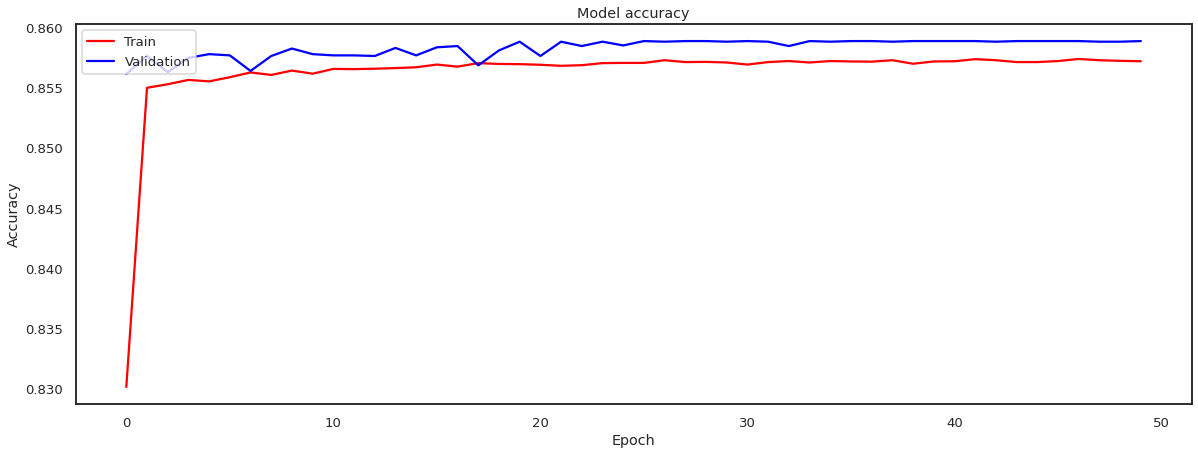

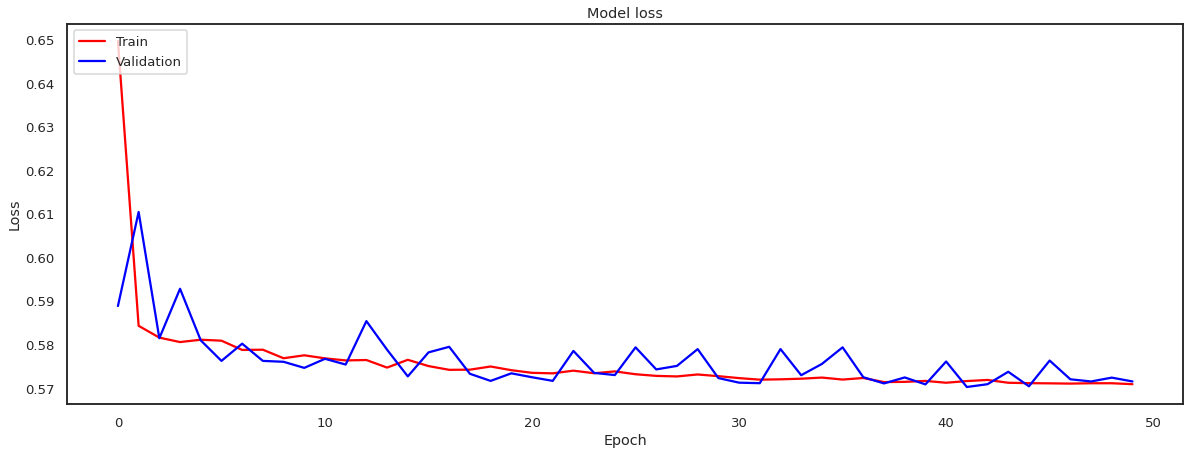

In [30]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], color = 'red')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], color = 'red')
plt.plot(history.history['val_loss'], color = 'blue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()